In [1]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np
import glob

In [2]:
allrounder_t20 = pd.read_csv("C:\\Users\\SATWIK M BADIGER\\Desktop\\FINAL\\final.csv")
allrounder_t20.head(20)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,...,Bowl_Inns,Overs,Mdns,Bowl_Runs,Wkts,Bowl_Ave,Econ,Bowl_SSR,St,D/I
0,V Kohli,INDIA,2010-2019,75,70,20,2633,94*,52.66,1907,...,12,24.2,0,198,4,49.50,8.13,36.5,0,0.493
1,RG Sharma,INDIA,2007-2019,104,96,14,2633,118,32.10,1905,...,9,11.2,0,113,1,113.00,9.97,68.0,0,0.365
2,MJ Guptill,NEW ZEALAND,2009-2019,83,80,7,2436,105,33.36,1810,...,1,1.0,0,11,0,0.00,11.00,0.0,0,0.560
3,Shoaib Malik,PAKISTAN,2006-2019,111,104,30,2263,75,30.58,1824,...,46,90.0,0,644,28,23.00,7.15,19.2,0,0.450
4,BB McCullum,NEW ZEALAND,2005-2015,71,70,10,2140,123,35.66,1571,...,0,0.0,0,0,0,0.00,0.00,0.0,8,0.619
5,DA Warner,AUSTRALIA,2009-2019,76,76,8,2079,100*,30.57,1476,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.565
6,EJG Morgan,ENGLAND,2009-2019,86,84,17,2002,91,29.88,1475,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.430
7,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,28,0.830
8,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,0,0.050
9,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,0,0.0,0,0,0,0.00,0.00,0.0,28,0.830


In [3]:
features = ['Player','Team','Ave','SR', 'Wkts','Econ','Bowl_Ave','Bowl_SSR'] # features considered.
allrounder_t20 = allrounder_t20.dropna(subset=features) # remove rows not dont have numerical value from the features.
allrounder_t20 = allrounder_t20[features].copy()
allrounder_t20

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR
0,V Kohli,INDIA,52.66,138.07,4,8.13,49.5,36.5
1,RG Sharma,INDIA,32.10,138.21,1,9.97,113.0,68.0
2,MJ Guptill,NEW ZEALAND,33.36,134.58,0,11.00,0.0,0.0
3,Shoaib Malik,PAKISTAN,30.58,124.06,28,7.15,23.0,19.2
4,BB McCullum,NEW ZEALAND,35.66,136.21,0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
2099,RazaurRehman,0,0.00,0.00,2,6.44,29.0,27.0
2100,ImamulHaq,0,0.00,0.00,0,0.00,0.0,0.0
2101,InzamamulHaq,0,0.00,0.00,0,0.00,0.0,0.0
2102,MisbahulHaq,0,0.00,0.00,0,0.00,0.0,0.0


In [4]:
allrounder_t20 = allrounder_t20.dropna() # removing incorrect data
allrounder_t20

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR
0,V Kohli,INDIA,52.66,138.07,4,8.13,49.5,36.5
1,RG Sharma,INDIA,32.10,138.21,1,9.97,113.0,68.0
2,MJ Guptill,NEW ZEALAND,33.36,134.58,0,11.00,0.0,0.0
3,Shoaib Malik,PAKISTAN,30.58,124.06,28,7.15,23.0,19.2
4,BB McCullum,NEW ZEALAND,35.66,136.21,0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
2099,RazaurRehman,0,0.00,0.00,2,6.44,29.0,27.0
2100,ImamulHaq,0,0.00,0.00,0,0.00,0.0,0.0
2101,InzamamulHaq,0,0.00,0.00,0,0.00,0.0,0.0
2102,MisbahulHaq,0,0.00,0.00,0,0.00,0.0,0.0


In [5]:
# scaling the data.
scaler = StandardScaler()
features = ['Ave','SR', 'Wkts','Econ','Bowl_Ave','Bowl_SSR']
scaled_data = pd.DataFrame( scaler.fit_transform(allrounder_t20[features]) , columns = features )
df = PCA(2).fit_transform(scaled_data)
scaled_data

,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR
0,3.115670,1.040847,-0.154898,0.657367,1.866716,1.772908
1,1.512724,1.043680,-0.414240,1.085312,5.346777,4.063953
2,1.610959,0.970224,-0.500687,1.324868,-0.846088,-0.881794
3,1.394218,0.757342,1.919833,0.429440,0.414407,0.514652
4,1.790277,1.003208,-0.500687,-1.233499,-0.846088,-0.881794
...,...,...,...,...,...,...
2099,-0.989931,-1.753123,-0.327792,0.264309,0.743231,1.081958
2100,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794
2101,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794
2102,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794


In [6]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k, max_iter=k_max_iter, n_init=50)
        km.fit(df)
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

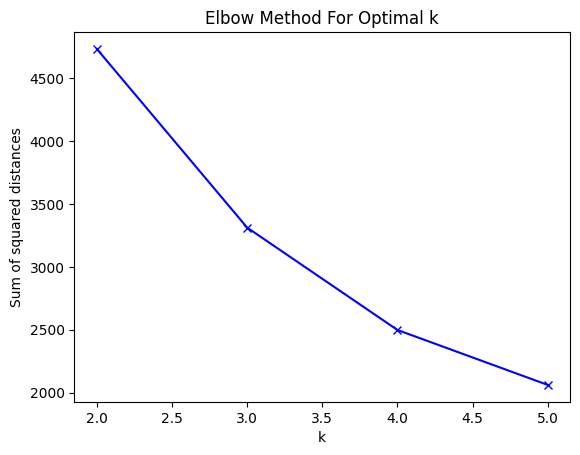

In [7]:
elbow_plot(2,5,50)

In [8]:
# Clustering the players using k-means algorithm
km = KMeans(n_clusters=5,n_init=50)
label = km.fit_predict(df)
scaled_data['Cluster'] = km.labels_ # assigning the cluster number for each datapoint in the dataframe.
scaled_data['Cluster'].value_counts()
label

array([1, 2, 0, ..., 3, 3, 3])

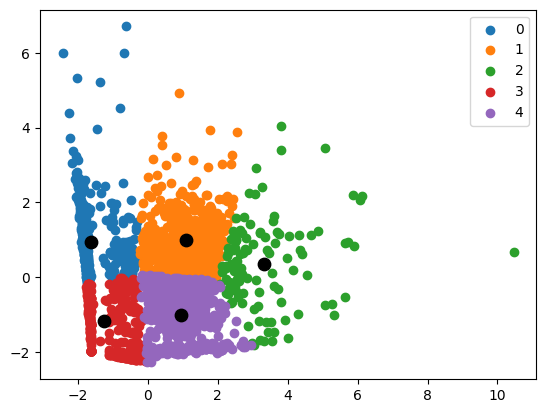

In [9]:
centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label==i,0],df[label==i,1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()

In [10]:
scaled_data.insert(0,'Player',allrounder_t20['Player']) # adding player name to the cluster...
scaled_data.insert(1,'Team',allrounder_t20['Team'])
# scaled_data

In [11]:
# spliting the dataframe into diffrent clusters.
b0 = scaled_data.loc[scaled_data['Cluster']==0]
b1 = scaled_data.loc[scaled_data['Cluster']==1]
b2 = scaled_data.loc[scaled_data['Cluster']==2]
b3 = scaled_data.loc[scaled_data['Cluster']==3]
b4 = scaled_data.loc[scaled_data['Cluster']==4]

In [12]:
len(b0),len(b1),len(b2),len(b3),len(b4)

(528, 504, 113, 434, 525)

In [13]:
b0

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR,Cluster
2,MJ Guptill,NEW ZEALAND,1.610959,0.970224,-0.500687,1.324868,-0.846088,-0.881794,0
4,BB McCullum,NEW ZEALAND,1.790277,1.003208,-0.500687,-1.233499,-0.846088,-0.881794,0
5,DA Warner,AUSTRALIA,1.393439,1.097103,-0.500687,-1.233499,-0.846088,-0.881794,0
6,EJG Morgan,ENGLAND,1.339643,0.993293,-0.500687,-1.233499,-0.846088,-0.881794,0
9,Mohammad Shahzad,AFGHANISTAN,1.444115,0.974878,-0.500687,-1.233499,-0.846088,-0.881794,0
...,...,...,...,...,...,...,...,...,...
1550,A Nao,PAPUA NEW GUINEA,-0.989931,1.788159,-0.500687,1.045774,-0.846088,-0.881794,0
1559,Sumair Khan,MALTA,-0.444181,0.607597,-0.500687,-1.233499,-0.846088,-0.881794,0
1564,U Aryaman Sunil,SINGAPORE,-0.522145,1.282261,-0.500687,0.936462,-0.846088,-0.881794,0
1583,Omar Hayat,DENMARK,-0.756038,1.282261,-0.500687,1.324868,-0.846088,-0.881794,0


In [14]:
b1

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR,Cluster
0,V Kohli,INDIA,3.115670,1.040847,-0.154898,0.657367,1.866716,1.772908,1
3,Shoaib Malik,PAKISTAN,1.394218,0.757342,1.919833,0.429440,0.414407,0.514652,1
7,Mohammad Shahzad,AFGHANISTAN,1.444115,0.974878,0.623126,0.750398,0.886270,0.732847,1
8,Mohammad Shahzad,AFGHANISTAN,1.444115,0.974878,0.623126,0.750398,0.886270,0.732847,1
11,Mohammad Shahzad,UAE,0.227092,0.626011,0.623126,0.750398,0.886270,0.732847,1
...,...,...,...,...,...,...,...,...,...
1621,JL Pattinson,AUSTRALIA,-0.989931,1.619391,-0.241345,0.627132,1.053423,1.009227,1
1627,RJ Sidebottom,ENGLAND,-0.989931,0.776364,1.487598,0.427114,0.195190,0.274638,1
1653,CBRLS Kumara,SRI LANKA,-0.678074,2.294056,-0.241345,0.645738,0.925729,0.863764,1
1702,KAJ Roach,WEST INDIES,-0.989931,1.282261,0.363785,0.459675,0.710349,0.820125,1


In [15]:
b2

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR,Cluster
1,RG Sharma,INDIA,1.512724,1.043680,-0.414240,1.085312,5.346777,4.063953,2
23,H Masakadza,ZIMBABWE,1.034023,0.618524,-0.327792,0.955068,2.250345,1.736542,2
40,Shahid Afridi,PAKISTAN,0.407190,1.282261,7.971133,0.308499,0.493325,0.725574,2
166,Muhammad Tanveer,QUATER,2.042881,0.863378,-0.414240,0.596896,2.606571,2.609321,2
171,TH David,SINGAPORE,1.901766,1.260002,-0.241345,0.869014,2.843873,2.362034,2
...,...,...,...,...,...,...,...,...,...
1938,Taijul Islam,BANGLADESH,-0.989931,-1.753123,-0.414240,0.692254,2.332551,2.172932,2
1971,MS Crane,ENGLAND,-0.989931,-1.753123,-0.414240,0.568987,2.551767,2.609321,2
1995,Iftikhar Anjum,PAKISTAN,-0.989931,-1.753123,-0.414240,0.713186,2.825788,2.609321,2
2041,MA Parker,SCOTLAND,-0.989931,-1.753123,-0.414240,1.129502,2.496963,1.736542,2


In [16]:
b3

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR,Cluster
416,Junaid Siddique,UAE,-0.860510,-1.157985,-0.500687,-1.233499,-0.846088,-0.881794,3
417,Junaid Siddique,UAE,-0.860510,-1.157985,-0.500687,-1.233499,-0.846088,-0.881794,3
438,Rashid Khan,NEPAL,-0.989931,-1.753123,-0.500687,-0.128750,-0.846088,-0.881794,3
439,Rashid Khan,NEPAL,-0.989931,-1.753123,-0.500687,-0.128750,-0.846088,-0.881794,3
485,MA Ouma,KENYA,-0.440282,-0.147000,-0.500687,-1.233499,-0.846088,-0.881794,3
...,...,...,...,...,...,...,...,...,...
2085,SR Welsh,CANADA,-0.989931,-1.753123,-0.327792,-0.768342,-0.681676,-0.227210,3
2100,ImamulHaq,0,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794,3
2101,InzamamulHaq,0,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794,3
2102,MisbahulHaq,0,-0.989931,-1.753123,-0.500687,-1.233499,-0.846088,-0.881794,3


In [17]:
b4

,Player,Team,Ave,SR,Wkts,Econ,Bowl_Ave,Bowl_SSR,Cluster
310,Aftab Ahmed,DENMARK,-0.210288,-0.196578,-0.414240,1.092289,-0.298047,-0.445405,4
311,Aftab Ahmed,DENMARK,-0.210288,-0.196578,-0.414240,1.092289,-0.298047,-0.445405,4
312,Aftab Ahmed,DENMARK,-0.210288,-0.196578,-0.500687,4.348393,-0.846088,-0.881794,4
313,Aftab Ahmed,DENMARK,-0.210288,-0.196578,-0.500687,4.348393,-0.846088,-0.881794,4
314,T Mishra,KENYA,0.189669,-0.006563,-0.241345,0.301521,-0.243243,-0.154479,4
...,...,...,...,...,...,...,...,...,...
2095,NaveenulHaq,0,-0.989931,-1.753123,0.104443,0.348037,-0.047592,0.049170,4
2096,NavedulHasan,0,-0.989931,-1.753123,-0.068451,0.422462,0.260955,0.354642,4
2097,M SimpsonParker,0,-0.989931,-1.753123,-0.241345,0.627132,-0.115549,-0.154479,4
2098,LHB HarringtonMyers,0,-0.989931,-1.753123,-0.327792,0.278263,-0.133635,-0.009015,4


In [18]:
print(scaled_data['Cluster'].value_counts())

Cluster
0    528
4    525
1    504
3    434
2    113
Name: count, dtype: int64


In [19]:
def cluster_data(data, column_name ,value):
    return( data[data[column_name] == value])

column_name = 'Team'
column_value = 'INDIA'
result = cluster_data(b1, column_name ,column_value)

print(result)

                 Player   Team       Ave        SR      Wkts      Econ  \
0               V Kohli  INDIA  3.115670  1.040847 -0.154898  0.657367   
29             SK Raina  INDIA  1.285068  0.976092  0.623126  0.531774   
52         Yuvraj Singh  INDIA  1.194629  1.006649  1.919833  0.408508   
182            V Sehwag  INDIA  0.715929  1.188772 -0.500687  3.418078   
231           HH Pandya  INDIA  0.281667  1.233898  2.784305  0.708534   
296           YK Pathan  INDIA  0.425122  1.213055  0.623126  0.769005   
392           IK Pathan  INDIA  0.925653  0.663852  1.919833  0.631783   
402           RA Jadeja  INDIA -0.082426  0.245779  2.524963  0.436417   
497            R Ashwin  INDIA  1.407472  0.411106  3.994565  0.387575   
506           KH Pandya  INDIA  0.896806  0.908302  0.709573  0.652715   
549     Harbhajan Singh  INDIA  0.062587  0.758759  1.660492  0.208490   
585           V Shankar  INDIA  0.978668  1.046513 -0.068451  0.880643   
733            AR Patel  INDIA  0.3354